# HW8 Q2

- Accuracy
  - Formula
    - $\frac {TP+TN} {TP+TN+FP+FN}$
  - Possible Scenario
    - Identifying whether a product is defect-free or defective
    - Rationale: Because we are interested in how we predict both non-defective and defective products, so we want to explore proportion of them ($TP$ and $TN$) to all other possibilities
- Sensitivity 
  - Formula
    -$\frac {TP} {TP+FN}$
  - Possible Scenario
    - Screening for severa diseases
    - Rationale: Missing $TP$ (successfully screen the disease) here is terrible and can have severe consequences, so we only want the proportion of $TP$ to all other "predicted positive", $TP+FN$
- Specificity 
  - Formula
    - $\frac {TN} {TN+FP}$
  - Possible Scenario
    - Identifying legitimate transactions versus fraudulent ones
    - Rationale: We want fraud detection ($TN$) to be as accurate as possible. A misdetection ($FP$) can be so inconvenient for customers, so we only want the proportion of $TN$ to all other "predicted negative", $TN+FP$
- Precision
  - Formula
    - $\frac {TP} {TP+FP}$
  - Possible Scenario
    - Classifying emails as spam or non-spam
    - Rationale: We want to ensure that flagged emails are actually spam to avoid misclassifying; in other words, we penalize wrongly classifying non-spam emails as spam ($FP$), so we only want proportion of $TP$ to all actual positive points, $TP+FP$

## GPT's summary
- https://chatgpt.com/share/673ff732-90c4-8006-b07d-4bf92a3f1da0

# HW8 Q4

In [19]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced_noNaN = ab.dropna()

# Split the data into features and target
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in the training and test data sets
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')


Training set size: 248
Test set size: 62


The code above just created an 80/20 split for training and testing.

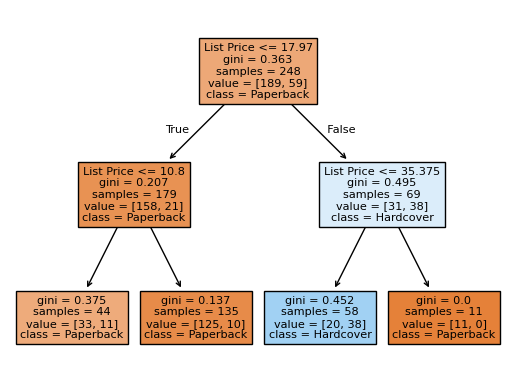

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the classifier with max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Display the tree to explain predictions
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'])
plt.show()

Here's the decision tree and I'll evaluate the model.

Accuracy: 0.90


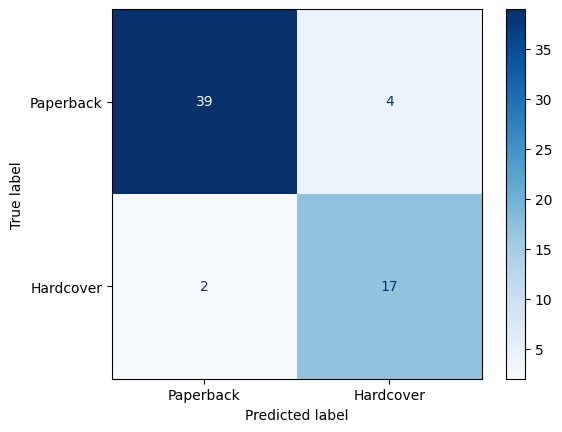

In [21]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')
plt.show()


Here's the confusion matrix and I got an 90% accuracy.

## GPT's summary
- https://chatgpt.com/share/673ffe5d-a124-8006-91e3-fc2917d8afdd

# HW8 Q6

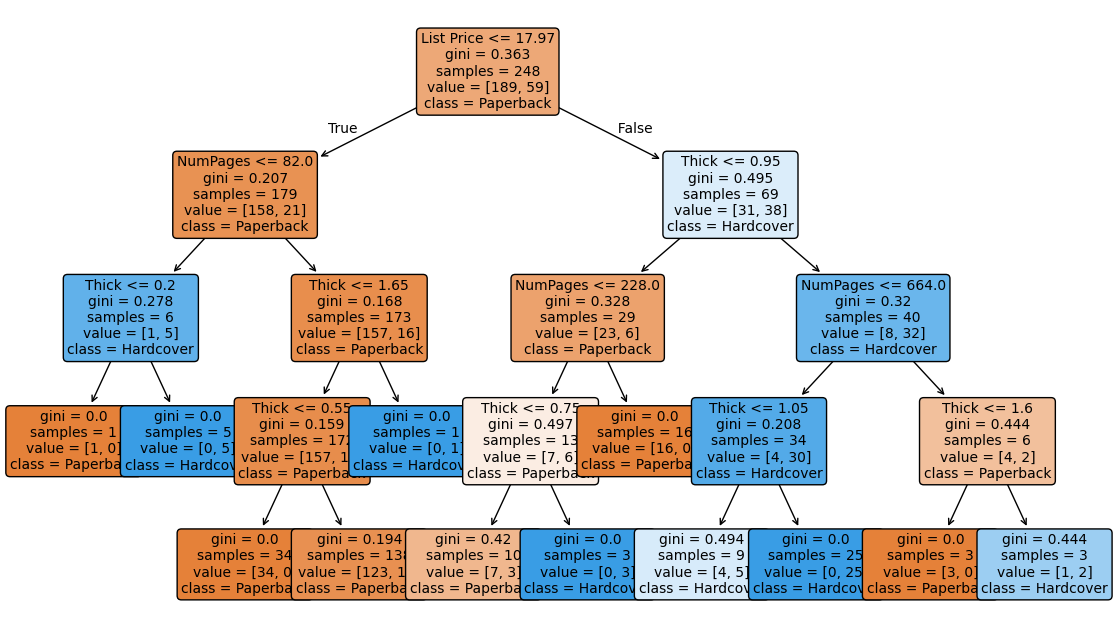

In [22]:
# Select the new predictor variables
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Target variable remains the same
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the classifier with max_depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model
clf2.fit(X_train, y_train)

# Display the tree to explain predictions
plt.figure(figsize=(14, 8))
tree.plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], rounded=True, fontsize=10)
plt.show()

Here's the `clf2` and its visualization. Now, I'll calculate the confusion matrices.

Confusion Matrix of clf


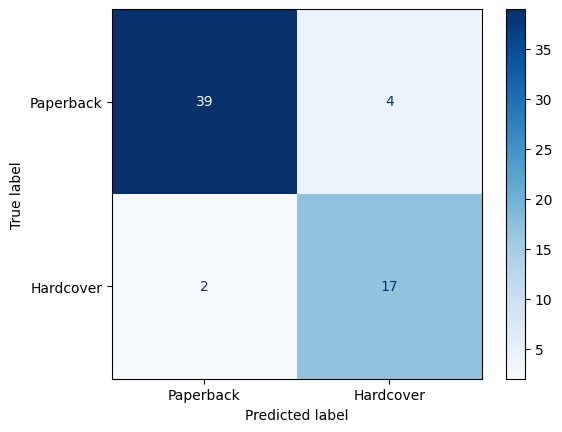


Confusion Matrix of clf2


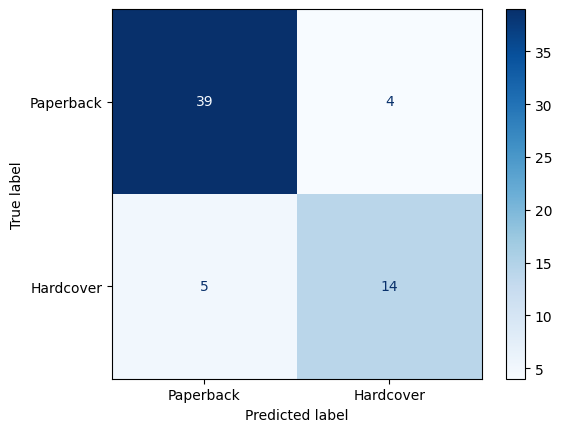

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = clf2.predict(X_test)

# Compute the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)

print('Confusion Matrix of clf')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')
plt.show()

print('\nConfusion Matrix of clf2')
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')
plt.show()

Then, I'll calculate sensitivity, specificity and accuracy for each model.

In [25]:
TN, FP, FN, TP = cm.ravel()

sensitivity_clf = TP / (TP + FN)
specificity_clf = TN / (TN + FP)
accuracy_clf = (TP + TN) / (TP + TN + FP + FN)

print(f"clf - Sensitivity: {sensitivity_clf:.2f}")
print(f"clf - Specificity: {specificity_clf:.2f}")
print(f"clf - Accuracy: {accuracy_clf:.2f}")

TN2, FP2, FN2, TP2 = cm2.ravel()

sensitivity_clf2 = TP2 / (TP2 + FN2)
specificity_clf2 = TN2 / (TN2 + FP2)
accuracy_clf2 = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)

print(f"\nclf2 - Sensitivity: {sensitivity_clf2:.2f}")
print(f"clf2 - Specificity: {specificity_clf2:.2f}")
print(f"clf2 - Accuracy: {accuracy_clf2:.2f}")


clf - Sensitivity: 0.89
clf - Specificity: 0.91
clf - Accuracy: 0.90

clf2 - Sensitivity: 0.74
clf2 - Specificity: 0.91
clf2 - Accuracy: 0.85


## GPT's summary
- https://chatgpt.com/share/673ffe5d-a124-8006-91e3-fc2917d8afdd

# HW8 Q7


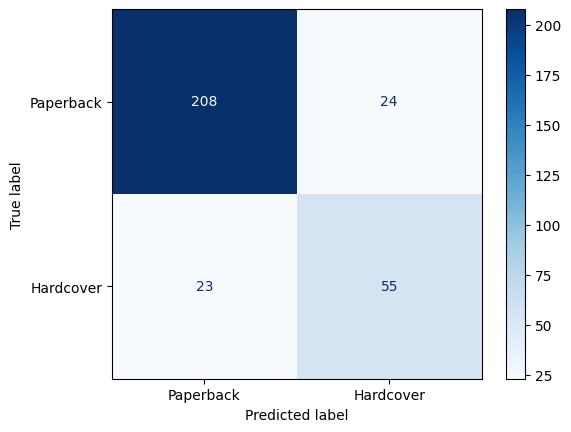

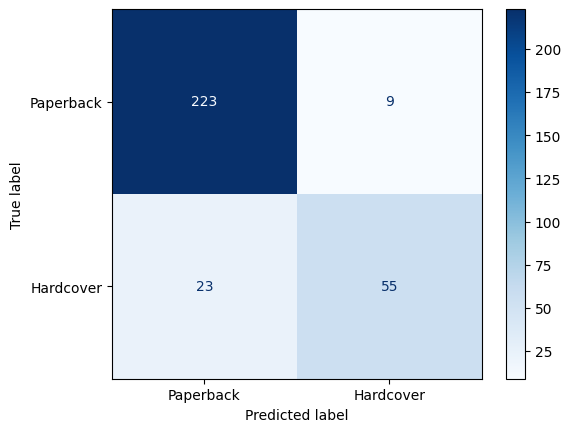

In [30]:
ConfusionMatrixDisplay(
    confusion_matrix(y, 
                     clf.predict(ab_reduced_noNaN[['List Price']]), 
                     labels=[0, 1]), display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')
plt.show()

ConfusionMatrixDisplay(
    confusion_matrix(y, 
                     clf2.predict(ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]), 
                     labels=[0, 1]), display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')
plt.show()


- The differences between these two confusion matrices come from the set of features used to train the model. Specifically, We used `List Price` for `clf` and `NumPages` `Thick` `List Price` for `clf2`. The increased number of features in the second model likely causes a better predictive performance. 

- The confusion matrices for `clf` and `clf2` from `Q6` are better because they were evaluated on the test data. As a result, we can get more accurate model assessments. Confusion matrices based on training data can overestimate performance due to overfitting.

## GPT's summary
- https://chatgpt.com/share/673ffe5d-a124-8006-91e3-fc2917d8afdd